# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# assert if images and labels are matched
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# get some statistics of this German traffic sign dataset
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:       {} samples".format(len(X_train)))
print("Validation Set:    {} samples".format(len(X_valid)))
print("Test set:             {} samples".format(len(X_test)))
print("finished")


Image Shape: (32, 32, 3)

Training Set:       34799 samples
Validation Set:    4410 samples
Test set:             12630 samples
finished


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples     =", n_train)
print("Number of validation examples  =", n_validation)
print("Number of testing examples       =", n_test)
print("The shape of traffic sign image   =", image_shape)
print("Number of traffic sign classes     =", n_classes)
print("finished")

Number of training examples     = 34799
Number of validation examples  = 4410
Number of testing examples       = 12630
The shape of traffic sign image   = (32, 32, 3)
Number of traffic sign classes     = 43
finished


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open-ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

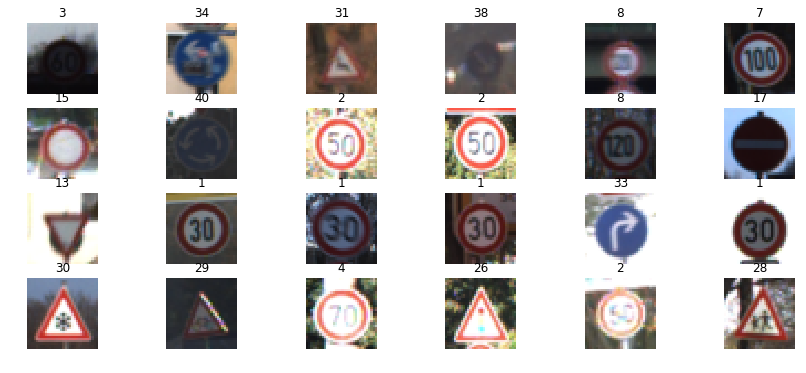

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# demo one random traffic sign image
#index = random.randint(0,len(X_train))
#image = X_train[index]
#plt.figure(figsize = (2,2))
#plt.imshow(image)
#print(y_train[index])

# plotting traffic sign images: demonstrating 24 random traffic sign images
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for i in range(24):
    index = random.randint(0,len(X_train))
    image = X_train[index]
    axis[i].axis('off')
    axis[i].imshow(image)
    axis[i].set_title(y_train[index])

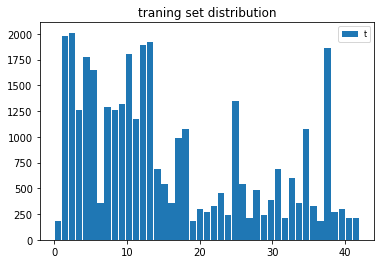

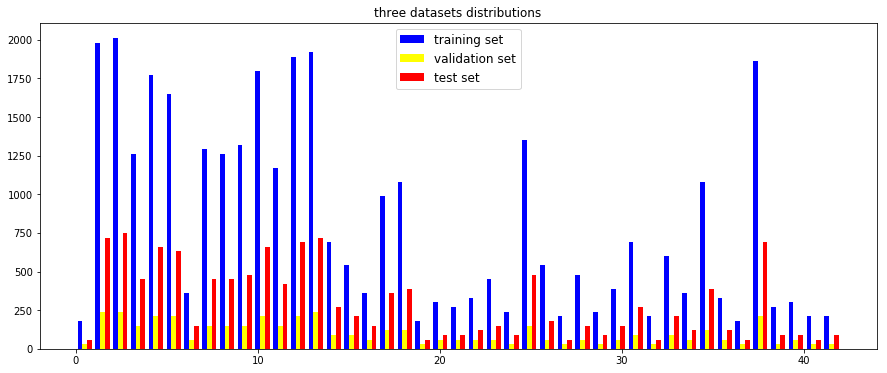

finished


In [4]:
# plotting the count of each traffic sign: constructing the dataset histogram
# here I tried two different methos to draw: 

# 1. the histograms of training set
histogram, bins = np.histogram(y_train, n_classes)
width = 0.9*(bins[1] - bins[0])
center = (bins[:-1]+ bins[1:])/2
plt.bar(center, histogram, align = 'center', width= width)
plt.title('traning set distribution')
plt.legend('train',loc = 'upper right', fontsize = 8)
plt.show()

# 2. the multi-histogram of all three datasets
figure,ax0 = plt.subplots(1,1,figsize=(15,6))
ax0.hist([y_train,y_valid,y_test],bins,histtype ='bar',color = ['blue','yellow','red'],\
          label = ['training set','validation set','test set'])
ax0.legend(prop = {'size': 12})
ax0.set_title('three datasets distributions')
plt.show()

print("finished")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

original RGB image shape   =  (34799, 32, 32, 3)
converted gray image shape =  (34799, 32, 32, 1)
finished


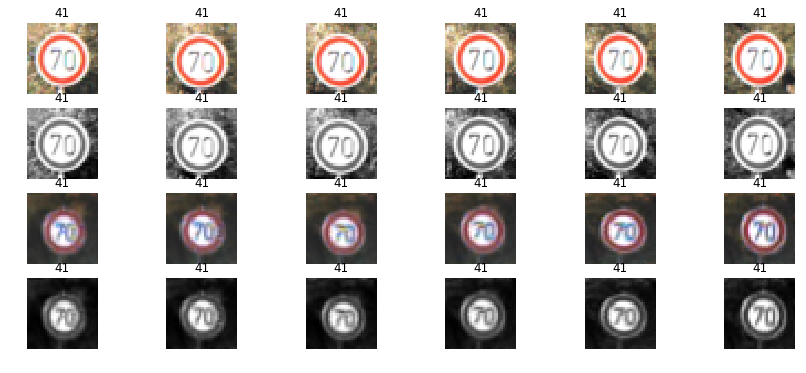

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# converting original rgb images into gray images
X_train_rgb = X_train
X_valid_rgb = X_valid
X_test_rgb = X_test
#print('original RGB image shape = ', X_train_rgb.shape)

X_train_gray = np.sum(X_train/3, axis =3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

print('original RGB image shape   = ', X_train_rgb.shape)
print('converted gray image shape = ', X_train_gray.shape)

# visualizing several outputs through color-convertion
offset = 8000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_rgb[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image)
        axis[index].set_title(y_train[index])        
    for i in range(6):
        index = i + (j+1)*6
        image = X_train_gray[index + offset - 6].squeeze()
        axis[index].axis('off')
        axis[index].imshow(image, cmap = 'gray')
        axis[index].set_title(y_train[index])
        
print('finished')

#### **My Note:** From this figure above we can see these datasets need to be shuffled. 

before normalization, the statistics of images:
82.677589037 66.0097957522
83.5564273756 67.9870214471
82.1484603612 66.7642435759
after normalization, the statistics of images:
-0.354081335648 0.515701529314
-0.347215411128 0.531148605055
-0.358215153428 0.521595652937
X_train_normalized: (34799, 32, 32, 1)


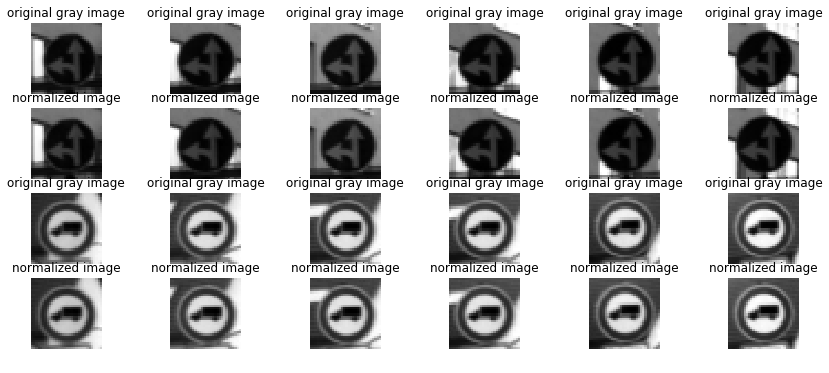

In [6]:
# data normalization 
print('before normalization, the statistics of images:')
print(np.mean(X_train_gray),np.std(X_train_gray))
print(np.mean(X_valid_gray),np.std(X_valid_gray))
print(np.mean(X_test_gray),np.std(X_test_gray))

X_train_normalized = (X_train_gray - 128)/128
X_valid_normalized = (X_valid_gray - 128)/128
X_test_normalized = (X_test_gray - 128)/128

print('after normalization, the statistics of images:')
print(np.mean(X_train_normalized),np.std(X_train_normalized))
print(np.mean(X_valid_normalized),np.std(X_valid_normalized))
print(np.mean(X_test_normalized),np.std(X_test_normalized))

# visualizing the normalized outputs 
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_gray[index + offset].squeeze()
        axis[index].axis('off')
        axis[index].imshow(image,cmap = 'gray')
        axis[index].set_title('original gray image')
    for i in range(6):
        index = i + (j+1)*6
        image = X_train_normalized[index + offset - 6].squeeze()
        axis[index].axis('off')
        axis[index].imshow(image, cmap = 'gray')
        axis[index].set_title('normalized image')

print('X_train_normalized:', X_train_normalized.shape)

#### Data augmentation(Optional), according to the experiences of Sermant and LeCun's work and Alex Krizhevsky's. 

**My Notes**

This section includes 5 data augmentation functions:
- random translation: also called shift. applies a random affine translation to images in [-2,2] horizontally or vertically or both.
- rotation: applies a 2D rotation affine transformation(5 degrees) to images.
- random perspective: applies a random perspective transformation to images.
- intensity adjustment: adjusts the intensities of images in new scales.
- random warping:applies a random 2D affine transformation to images.
- **horizontal reflection is not adopted**. Because traffic sign recognition is based on semantic recognition, horizontal reflection may lead to totally different misunderstanding, like the speed sign '60'and '09'.

The reference docs:

- [opencv Geometric Image Transformation](http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine)
- [cnblogs](www.cnblogs.com/pakfahome/p/3914318.html)

finished


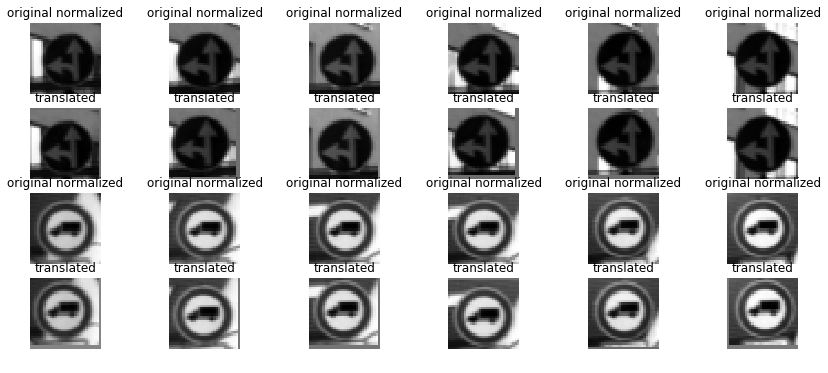

In [7]:
import cv2

def random_translation(image):
    n_rows, n_cols,n_channel = image.shape
    
    pixels = 2
    translation_x, translation_y = np.random.randint(-pixels, pixels, 2)
    
    M = np.float32([[1,0,translation_x],[0,1,translation_y]])
    result = cv2.warpAffine(image,M,(n_cols,n_rows))
    result = result[:,:,np.newaxis]
    
    return result
    
# visualizing several outputs through random translation.
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image.squeeze(),cmap = 'gray')
        axis[index].set_title('original normalized')
        
        res = random_translation(image)
        axis[index+6].axis('off')
        axis[index+6].imshow(res.squeeze(), cmap = 'gray')
        axis[index+6].set_title('translated')

print('finished')

finished


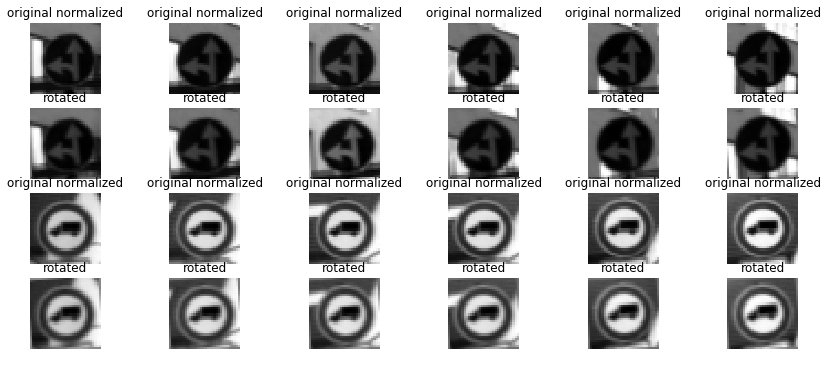

In [8]:
def rotation(image):
    n_rows,n_cols,n_channel = image.shape
    M = cv2.getRotationMatrix2D((n_cols/2,n_rows/2),5,1)
    result = cv2.warpAffine(image,M,(n_cols,n_rows))    
    result = result[:,:,np.newaxis]
    return result

# visualizing several outputs through random translation.
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image.squeeze(),cmap = 'gray')
        axis[index].set_title('original normalized')
       
        res = rotation(image)
        axis[index+6].axis('off')
        axis[index+6].imshow(res.squeeze(), cmap = 'gray')
        axis[index+6].set_title('rotated')

print('finished')

finished


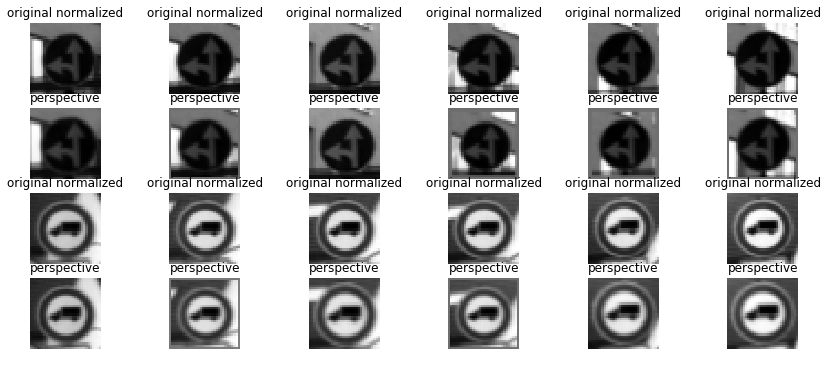

In [9]:
def random_perspective(image):
    
    n_rows,n_cols,n_channel = image.shape
    pixels = np.random.randint(-2,2)
    
    #source corners and destination corners
#    corners1 = np.float32([[0,0],[n_cols,0],[n_cols,n_rows],[n_rows,0]])
#    corners2 = np.float32([[pixels,pixels],[]])
    corners1 = np.float32([[pixels,pixels],[n_rows - pixels, pixels],[pixels,n_cols -pixels],\
                          [n_rows - pixels,n_cols - pixels]])    
    corners2 = np.float32([[0,0],[n_rows,0],[0,n_cols],[n_rows,n_cols]])
    
    M = cv2.getPerspectiveTransform(corners1,corners2)
    result = cv2.warpPerspective(image,M,(n_cols,n_rows))
    result = result[:,:,np.newaxis]
    
    return result

# visualizing several outputs through random translation.
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image.squeeze(),cmap = 'gray')
        axis[index].set_title('original normalized')
        
        res = random_perspective(image)
        axis[index+6].axis('off')
        axis[index+6].imshow(res.squeeze(), cmap = 'gray')
        axis[index+6].set_title('perspective')

print('finished')

finished


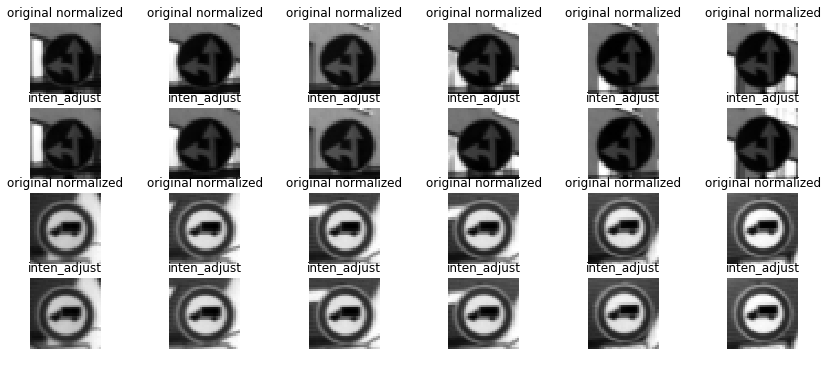

In [10]:
def intensity_adjustment(image):
    
    shifted = image + 1.0
    image_max_intensity = max(shifted.flatten())
    max_coef = 2.0/image_max_intensity
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef,max_coef)
    
    result = shifted * coef - 1.0
    return result

# visualizing several outputs through random translation.
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image.squeeze(),cmap = 'gray')
        axis[index].set_title('original normalized')
        
        res = intensity_adjustment(image)
        axis[index+6].axis('off')
        axis[index+6].imshow(res.squeeze(), cmap = 'gray')
        axis[index+6].set_title('inten_adjust')

print('finished')

finished


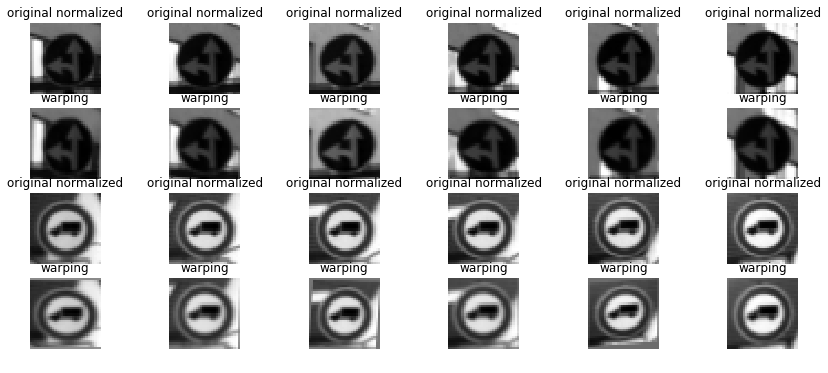

In [11]:
def random_warping(image):
    
    n_rows,n_cols,n_channel = image.shape
    
    random_dx = np.random.rand(3) - 0.5
    random_dx *= n_cols * 0.06
    random_dy = np.random.rand(3) - 0.5
    random_dy *= n_rows * 0.06
    
    # 0.25 height/width from image edges
    x1 = 0.25* n_cols
    x2 = 0.75* n_cols
    y1 = 0.25* n_rows
    y2 = 0.75* n_rows
    
    corners1 = np.float32([[x1,y1],[x1,y2],[x2,y1]])
    corners2 = np.float32([[x1+random_dx[0], y1+random_dy[0]],[x1+random_dx[1],y2+random_dy[1]],\
                           [x2+random_dx[2],y1+random_dy[2]]])
    
    M = cv2.getAffineTransform(corners1,corners2)
    result = cv2.warpAffine(image,M,(n_cols,n_rows))
    result = result[:,:,np.newaxis]
    return result

# visualizing several outputs through random translation.
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,4,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset]
        axis[index].axis('off')
        axis[index].imshow(image.squeeze(),cmap = 'gray')
        axis[index].set_title('original normalized')
        
        res = random_warping(image)
        axis[index+6].axis('off')
        axis[index+6].imshow(res.squeeze(), cmap = 'gray')
        axis[index+6].set_title('warping')

print('finished')

before data augmentation, X_train,y_train shapes:  (34799, 32, 32, 1) (34799,)
before data augmentation, maximum and minimum of y_train: 2010 180
before data augmentation, X_validation, y_validation shapes:  (4410, 32, 32, 1) (4410,)
before data augmentation, maximum and minimum of y_val: 240 30


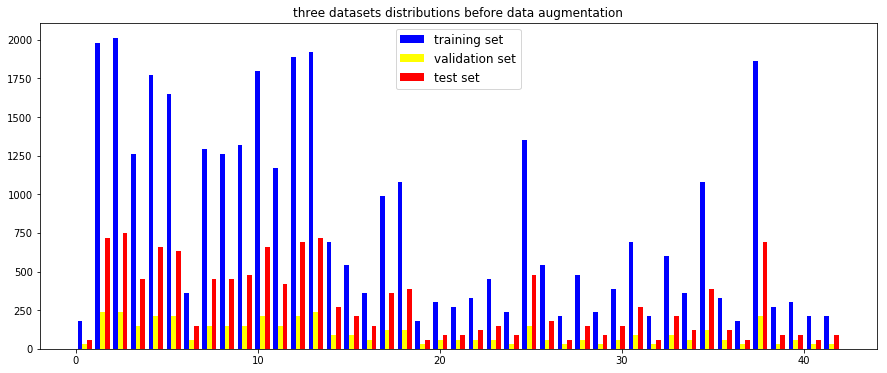

finished


In [12]:
print('before data augmentation, X_train,y_train shapes: ', X_train_normalized.shape, y_train.shape)
print('before data augmentation, maximum and minimum of y_train:', max(np.bincount(y_train)),min(np.bincount(y_train)))
print('before data augmentation, X_validation, y_validation shapes: ', X_valid_normalized.shape, y_valid.shape)
print('before data augmentation, maximum and minimum of y_val:', max(np.bincount(y_valid)),min(np.bincount(y_valid)))

figure,ax0 = plt.subplots(1,1,figsize=(15,6))
ax0.hist([y_train,y_valid,y_test],bins,histtype ='bar',color = ['blue','yellow','red'],label = ['training set','validation set','test set'])
ax0.legend(prop = {'size': 12})
ax0.set_title('three datasets distributions before data augmentation')
plt.show()

print('finished')

In [13]:
# implementing data augmentation
# on training set
for cls in range(n_classes):
    train_class_indices = np.where(y_train == cls)
    train_n_samples = len(train_class_indices[0])
    print(cls,train_n_samples)
    
    if train_n_samples < 800:
        for i in range(800 - train_n_samples):
            train_new_image = X_train_normalized[train_class_indices[0][i%train_n_samples]]
            train_new_image = random_warping(intensity_adjustment(random_perspective(rotation(random_translation(train_new_image)))))
            X_train_normalized = np.concatenate((X_train_normalized,[train_new_image]),axis = 0)
            y_train = np.concatenate((y_train,[cls]), axis = 0)

print('after data augmentation, X_train,y_train shapes: ', X_train_normalized.shape, y_train.shape)        
print('finished')

0 180
1 1980
2 2010
3 1260
4 1770
5 1650
6 360
7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920
14 690
15 540
16 360
17 990
18 1080
19 180
20 300
21 270
22 330
23 450
24 240
25 1350
26 540
27 210
28 480
29 240
30 390
31 690
32 210
33 599
34 360
35 1080
36 330
37 180
38 1860
39 270
40 300
41 210
42 210
after data augmentation, X_train,y_train shapes:  (46480, 32, 32, 1) (46480,)
finished


In [14]:
# implementing data augementation
# on validation set 
for cls in range(n_classes):
    valid_class_indices = np.where(y_valid == cls)
    valid_n_samples = len(valid_class_indices[0])
    print(cls, valid_n_samples)
    
    if valid_n_samples < 200:
        for i in range(200- valid_n_samples):
            valid_new_image = X_valid_normalized[valid_class_indices[0][i%valid_n_samples]]
            valid_new_image = random_warping(intensity_adjustment(random_perspective(rotation(random_translation(valid_new_image)))))
            X_valid_normalized = np.concatenate((X_valid_normalized,[valid_new_image]),axis = 0)
            y_valid = np.concatenate((y_valid,[cls]), axis = 0)

print('after data augmentation, X_valid,  y_valid shapes: ', X_valid_normalized.shape, y_valid.shape)        
print('finished')

0 30
1 240
2 240
3 150
4 210
5 210
6 60
7 150
8 150
9 150
10 210
11 150
12 210
13 240
14 90
15 90
16 60
17 120
18 120
19 30
20 60
21 60
22 60
23 60
24 30
25 150
26 60
27 30
28 60
29 30
30 60
31 90
32 30
33 90
34 60
35 120
36 60
37 30
38 210
39 30
40 60
41 30
42 30
after data augmentation, X_valid,  y_valid shapes:  (8770, 32, 32, 1) (8770,)
finished


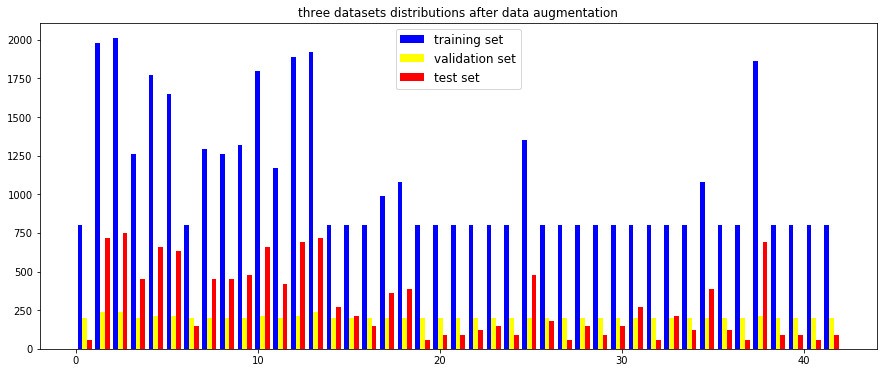

finished


In [15]:
figure,ax1 = plt.subplots(1,1,figsize=(15,6))
ax1.hist([y_train,y_valid,y_test],bins,histtype ='bar',color = ['blue','yellow','red'],label = ['training set','validation set','test set'])
ax1.legend(prop = {'size': 12})
ax1.set_title('three datasets distributions after data augmentation')
plt.show()

print('finished')

In [16]:
print('after data augmentation, the statistics of images:')
print(np.mean(X_train_normalized),np.std(X_train_normalized))
print(np.mean(X_valid_normalized),np.std(X_valid_normalized))
print(np.mean(X_test_normalized),np.std(X_test_normalized))

after data augmentation, the statistics of images:
-0.291821971308 0.515085935542
-0.23842136974 0.518761579951
-0.358215153428 0.521595652937


#### my notes: now the data augementation is over.

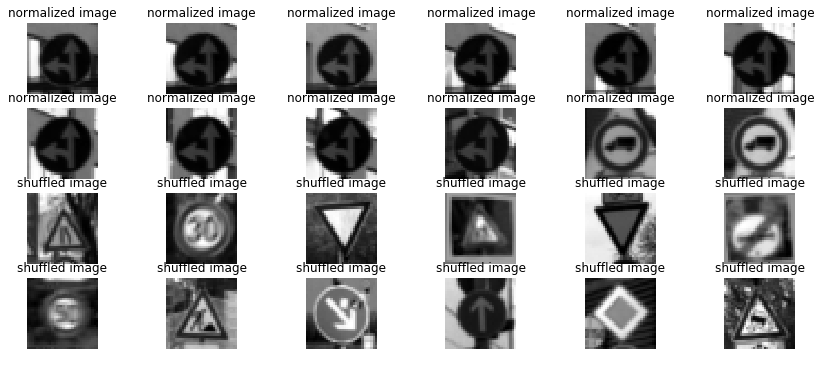

In [17]:
# shuffle the training data

from sklearn.utils import shuffle
# shuffle the training data
X_train_shuffled, y_train_shuffled = shuffle(X_train_normalized, y_train)
X_valid_shuffled, y_valid_shuffled = shuffle(X_valid_normalized, y_valid)

# visualizing the normalized outputs 
offset = 5000
figure, axis = plt.subplots(4,6,figsize=(15,6))
figure.subplots_adjust(hspace = 0.2, wspace = 0.001)
axis = axis.ravel()
for j in range(0,2):
    for i in range(6):
        index = i + j*6
        image = X_train_normalized[index + offset].squeeze()
        axis[index].axis('off')
        axis[index].imshow(image,cmap = 'gray')
        axis[index].set_title('normalized image')
for j in range(2,4):
    for i in range(6):
        index = i + j*6
        image = X_train_shuffled[index + offset].squeeze()
        axis[index].axis('off')
        axis[index].imshow(image, cmap = 'gray')
        axis[index].set_title('shuffled image')

#### **My Notes:** here we can see the effect of data shuffle. And the images are distributed randomly.

In [18]:
X_train = X_train_shuffled
y_train = y_train_shuffled

X_valid = X_valid_shuffled
y_valid = y_valid_shuffled

# print(X_train.shape, y_train[0:100])
# print(X_valid.shape, y_valid[0:100])
print("finished")

finished


### Setup Tensorflow

In [30]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# setup tensorflow
import tensorflow as tf

epochs = 100
batch_size = 256

print('finished')

finished


![lenet](./imgs/lenet.png)
**Source: Yan LeCun - "Gradient-based Learning Applied to Document Recognition" Proceedings of IEEE 1998**

### Model Architecture 1 : Modified LeNet 
**Input**

This CNN model accepts a 32x32x1 image as input.

**Architecture**

**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function, according to AlexNet.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you. The output shape should be 400.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**A dropout layer is added here with keep_prob 0.5, according to the experience of AlexNet.** 

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**A dropout layer is added here with keep_prob 0.5, according to the experience of AlexNet.** 

**Layer 5: Fully Connected (Logits). **This should have 43 outputs.

**Output** 

Return the results of 43 classes.

In [31]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # hyperparameters used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID'), conv1_b)
    # ReLU
    conv1 = tf.nn.relu(conv1)
    # Dropout
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding ='VALID')
    
    # Layer 2: convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1,conv2_W, strides = [1,1,1,1], padding = 'VALID'), conv2_b)
    # ReLU
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: fully connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    # ReLU
    fc1 = tf.nn.relu(fc1)
    # dropout
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    # Layer 4: fully connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1,fc2_W), fc2_b)
    # ReLU
    fc2 = tf.nn.relu(fc2)
    # dropout
    fc2 = tf.nn.dropout(fc2,keep_prob)
    
    # Layer 5: fully connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2,fc3_W),fc3_b)
    
    return logits     

print('finished')

finished


![MSLeNet](./imgs/MSLeNet.jpeg)

**Source: Pierre Serment and Yann LeCun - "Traffic Sign Recognition with Multi-scale Convolutional Networks" IJCNN2011**

![alexnet](./imgs/alexnet.png)
**Source: Alex Krizhevsky, Iiya Sutskever and Geoffrey E.Hinton - "ImageNet Classification with Deep Convolutionnal Neural Networks" NIPS2012**

### Model Architecture 2 : Multi-scale CNN  

**Input**

This CNN model accepts a 32x32x1 image as input.

**Architecture**

**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**Pooling.** The output shape should be 5x5x16.

**Layer 3: Convolutional.** The output shape should be 1x1x400.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function. 

**Layer 4: Flatten.** Flatten the outputs of layer 2 (scale1: 5x5x16 = 400)and layer 3 (scale2: 1x1x400 = 400)as 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you. Two outputs of 2 scales stand for different levels of image features: local and global abstractions, respectively.

**Layer 5: Concatenated Layer.** The output shape including scale 1 and scale 2 should be 800(400+400 = 800). And this output will be used to feed classifier layer.

**A dropout layer is added here with keep_prob 0.5, according to the experience of AlexNet.** 

**Layer 6: Fully Connected.** This layer has an output of 120.

**Activation.** Choose Rectified Linear Unit(ReLU) as activation function.

**A dropout layer is added with keep_prob 0.5, based on the experience of AlexNet.**

**Layer 7: Fully Connected(Logits).** This should have 43 outputs.

**Output** 

Return the results of 43 classes.

In [32]:
from tensorflow.contrib.layers import flatten

def MSCNN(x):
    # hyperparameters used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma), name = 'W1')
    conv1_b = tf.Variable(tf.zeros(6), name = 'b1')
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID'), conv1_b, name = 'conv1')
    # ReLU
    conv1 = tf.nn.relu(conv1)
    # Dropout
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding ='VALID')
    
    # Layer 2: convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma), name = 'W2')
    conv2_b = tf.Variable(tf.zeros(16), name = 'b2')
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1,conv2_W, strides = [1,1,1,1], padding = 'VALID'), conv2_b, name = 'conv2')
    # ReLU
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Layer 3: convolutional. Input = 5x5x16. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape = (5,5,16,400), mean = mu, stddev = sigma), name = 'W3')
    conv3_b = tf.Variable(tf.zeros(400), name = 'b3')
    conv3 = tf.nn.bias_add(tf.nn.conv2d(conv2, conv3_W, strides = [1,1,1,1], padding ="VALID"), conv3_b, name = 'conv3')
    # ReLU
    conv3 = tf.nn.relu(conv3)
    
    # Layer 4: Flatten. Scale 1 input = 5x5x16, output1 = 400. Scale 2 input = 1x1x400, output 2 = 400.
    scale1= flatten(conv2)
    scale2 = flatten(conv3) 
    
    # Layer 5: Concatenated layer. Input = 400 + 400 . Output = 800.
    concatenated5 = tf.concat_v2([scale1, scale2], 1)
    concatenated5 = tf.nn.dropout(concatenated5, keep_prob)
    
    # Layer 6: fully connected. Input = 800. Output = 120.
    fc6_W = tf.Variable(tf.truncated_normal(shape=(800,120), mean = mu, stddev = sigma), name = 'W6')
    fc6_b = tf.Variable(tf.zeros(120), name = 'b6')
    fc6 =  tf.add(tf.matmul(concatenated5,fc6_W),fc6_b) 
    # ReLU
    fc6 = tf.nn.relu(fc6)
    # Dropout
    fc6 = tf.nn.dropout(fc6,keep_prob)
    
    # Layer 7: fully connected. Input = 120, output = 43.
    fc7_W = tf.Variable(tf.truncated_normal(shape = (120,43), mean = mu, stddev = sigma), name = 'W7')
    fc7_b = tf.Variable(tf.zeros(43), name = 'b7')
    logits = tf.add(tf.matmul(fc6, fc7_W), fc7_b)
    
#    fc7 = tf.nn.relu(fc7)
#    fc7 = tf.nn.dropout(fc7,keep_prob)
    
    # Layer 8: fully connected. Input
#    fc8_W = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma), name = 'W8')
#    fc8_b = tf.Variable(tf.zeros(43),name = 'b8')
#    logits = tf.add(tf.matmul(fc7,fc8_W), fc8_b)
    return logits     

print('finished')
    

finished


In [33]:
# features and labels
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
tf.reset_default_graph()

x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
keep_prob = tf.placeholder(tf.float32)
one_hot_encoding = tf.one_hot(y,43)

print('finished')

finished


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [37]:
# training pipeline
learning_rate = 0.0009

logits = MSCNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_encoding, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_encoding,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y:batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy/num_examples

print('finished')
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

finished


In [39]:
### Train your model here.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print(num_examples)
    print('Training...')
    print()
    
    for i in range(epochs):
        X_train, y_train = shuffle(X_train,y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid,y_valid)
        print(X_valid.shape,y_valid.shape)
        print("epoch {}...".format(i+1))
        print("validation accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess,'./lenet')
    print("Model saved")

46480
Training...

(8770, 32, 32, 1) (8770,)
epoch 1...
validation accuracy = 0.621

(8770, 32, 32, 1) (8770,)
epoch 2...
validation accuracy = 0.758

(8770, 32, 32, 1) (8770,)
epoch 3...
validation accuracy = 0.805

(8770, 32, 32, 1) (8770,)
epoch 4...
validation accuracy = 0.854

(8770, 32, 32, 1) (8770,)
epoch 5...
validation accuracy = 0.860

(8770, 32, 32, 1) (8770,)
epoch 6...
validation accuracy = 0.869

(8770, 32, 32, 1) (8770,)
epoch 7...
validation accuracy = 0.884

(8770, 32, 32, 1) (8770,)
epoch 8...
validation accuracy = 0.888

(8770, 32, 32, 1) (8770,)
epoch 9...
validation accuracy = 0.894

(8770, 32, 32, 1) (8770,)
epoch 10...
validation accuracy = 0.892

(8770, 32, 32, 1) (8770,)
epoch 11...
validation accuracy = 0.896

(8770, 32, 32, 1) (8770,)
epoch 12...
validation accuracy = 0.903

(8770, 32, 32, 1) (8770,)
epoch 13...
validation accuracy = 0.902

(8770, 32, 32, 1) (8770,)
epoch 14...
validation accuracy = 0.911

(8770, 32, 32, 1) (8770,)
epoch 15...
validation acc

# Debugging log
- 2017/05/10 - validation accuracy: 0.910
   - model: Modified LeNet
   - data preprocessing: grayscale convert, data normalization, data shuffle.
   - parameters: epochs: 10, batch_size: 128, keep_prob: 0, learning_rate: 0.001, mu: 0, sigma: 0.1
- 2017/05/10 - validation accuracy: 0.936
   - model: Modified LeNet
   - data preprocessing and all other parameters remain the same except epochs :100
- 2017/05/10 - validation accuracy: 0.920
   - model: Modified LeNet
   - data preprocessing stays the same
   - parameters: epochs: 100, batch_size: 512, the rest stay the same: epochs: 100, learning_rate: 0.001, mu: 0, sigma: 0.1.
- 2017/05/11 - validation accuracy: 0.951
   - model: Modified LeNet
   - data preprocessing remains the same. Two dropout layers are designed to follow the two fully connected layers with keep_prob: 0.5 , batch_size: 512, epochs: 100, learning_rate: 0.001, mu: 0, sigma: 0.1, according to the experience of AlexNet.
- 2017/05/11 - validation accuracy: 0.966
   - model: Modified LeNet
   - data preprocessing and all other parameters remain the same, except batch_size: 128.
- 2017/05/12 - validation accuracy: 0.945
   - model: multi-scale CNN(MSCNN)
   - data preprocessing remains the same. Please refer to the cells above about MSCNN for more details.
   - parameters: epochs: 100, batch_size: 128, keep_prob: 0 , learning_rate: 0.001, mu: 0, sigma: 0.1.
- 2017/05/12 - validation accuracy: 0.968
   - model: MSCNN
   - data preprocessing and all parameters remain the same. Except that one dropout layer is added after the layer 5(concatenated layer) with keep_prob: 0.5.
- 2017/05/12 - validation accuracy: 0.953
   - model: MSCNN
   - data preprocessing stays the same.
   - parameters: epochs: 100, batch_size: 128, keep_prob: 0 , learning_rate: 0.0005 because there are some fluctuations of accuracies among last epochs, mu: 0, sigma: 0.1.
- 2017/05/12 - validation accuracy: 0.963
   - model: MSCNN
   - learning_rate: 0.0008. and other data preprocessing and parameters remain the same.
- 2017/05/13 - validation accuracy: 0.970
   - model: modified MSCNN
   - a fully connected layer FC7 and a dropout layer are added with keep_prob: 0.5. 
   - parameters: epochs: 100, batch_size: 128, learning_rate: 0.0008, mu: 0, sigma: 0.1.
- 2017/05/13 - validation accuracy: 0.973
   - model: modified MSCNN
   - a fully connected layer FC7 and a dropout layer are added with keep_prob: 0.5. 
   - parameters: epochs: 100, batch_size: 256, learning_rate: 0.0008, mu:0, sigma:0.1.
- 2017/05/14 - 05/17  - validation accuracy: 0.923->0.925->0.930->0.931->0.895->0.935->0.932
   - model: modified MSCNN
   - implementing data augmentation with my five self-built functions. Training samples: 34799->46480; validation: 4410->8770
   - a lot of a lot of exhausive debugging to improve the accuracy. Even on GPUs, it was a long story.
   - learning_rate: 0.0008-> 0.0008->0.0005->0.0001->0.001->0.0012->0.001
- 2017/05/18 - validation accuracy: 0.936->0.934.
   - model: modified MSCNN
   - parameters: epochs: 100, batch_size: 128, learning_rate: 0.001->0.0008,  keep_prob: 0.5, mu:0, sigma:0.1.
   - It seems data augmentation did not improve the accuracy after debugging, which made me very upset.
- 2017/05/18 - validation accuracy: 0.934.
   - model: modified MSCNN
   - parameters: epochs: 100, batch_size:256, learning_rate: 0.0008, keep_prob:0.5, mu:0 , sigma:0.1.
- 2017/05/18  - validation accuracy: 0.903.
   - model: modified MSCNN
   - parameters: epochs: 100, batch_size: 512, learning_rate: 0.0008, keep_prob:0.5, mu:0 , sigma:0.1.
- 2017/05/18 - validation accuracy: 0.920.
   - model: modified MSCNN
   - parameters: epochs: 150, batch_size: 512, learning_rate:0.0008, keep_prob:0.5, mu:0, sigma:0.1.
- 2017/05/18 - validation accuracy: 0.917.
   - model: modified MSCNN
   - parameters: epochs: 200, batch_size:512, learning_rate: 0.0008, keep_prob: 0.5, mu:0, sigma:0.1. 
- 2017/05/19 - validation accuracy: 0.915.
   - model: modified MSCNN
   - parameters: epochs:100, batch_size:256, learning_rate: 0.0008, keep_prob: 0.5, mu: 0, sigma:0.2.
- 2017/05/19  -validation accuracy: 0.905.
  - model: modified MSCNN
  - parameters:epochs:100, batch_size:256, learning_rate: 0.0008, keep_prob: 0.5, mu: 0, sigma:0.3.
- 2017/05/19  -validation accuracy: 0.917.
  - model: modified MSCNN
  - parameters:epochs:100, batch_size:256, learning_rate: 0.0008, keep_prob: 0.5, mu: 0, sigma:0.05.
- 2017/05/19  -validation accuracy: 0.904.
  - model: modified MSCNN
  - parameters:epochs:100, batch_size:256, learning_rate: 0.0008, keep_prob: 0.75, mu: 0, sigma:0.1. 
- 2017/05/29 - validation accuracy: 0.934
  - model: modified MSCNN
  - parameters: epochs:100, batch_size: 128, learning_rate: 0.0009, keep_prob: 0.5, mu:0, sigma:0.1.
- 2017/05/29 - validation accuracy: 0.936
  - model: modified MSCNN
  - parameters: epochs:100, batch_size: 256, learning_rate: 0.0009, keep_prob: 0.5, mu:0, sigma:0.1.

In [40]:
### Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
### Be sure to only do this once!st
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_normalized,y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.960


### My notes:
**- It's very interesting that test accuracy is pretty higher than training accuracy. I think this is because in data augmentation the original image data is artificially processed with 5 augmentation algorithms(random_translation, rotation, random_perspective, intensity_adjustment and random_warping), and the variety of training/validation data is much enhanced(34799images -> 46480images and 4410images->8770images). **

**- This pre-process has improved the generalization of my classifier efficiently. Then when it is tested on testing data(original images where the difficulty decreases), and the test accuracy is higher.**

---

## Step 3: Test a Model on New Images

Download at least five pictures(here I found ten) of German traffic signs from the web and use your model to predict the traffic sign type. This part will give me more understanding about the generalization of modified MSCNN classifier.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [41]:
# reinitialize and reimport if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('finished')

finished


(10, 32, 32, 1)


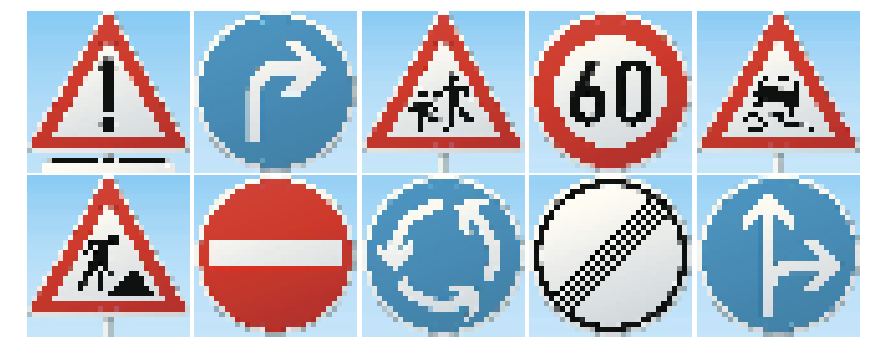

In [42]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.image as mpimg

fig, axes = plt.subplots(2,5,figsize=(15,6))
fig.subplots_adjust(hspace = .01, wspace = .001)
axes = axes.ravel()

new_images = []

for i, img in enumerate(glob.glob('./imgs/new_images/*.jpg' )):
    image = cv2.imread(img)
    image = cv2.resize(image,(32,32))
    axes[i].axis('off')
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    new_images.append(image)
    
new_images = np.asarray(new_images)
new_images_gray = np.sum(new_images/3, axis = 3, keepdims = True)
new_images_normalized =(new_images_gray - 128)/128

print(new_images_normalized.shape)

### Predict the Sign Type for Each Image

In [43]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

new_labels = [18,33,28,3,23,25,17,40,32,36]

with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess,"./lenet")
    
    new_accuracy = evaluate(new_images_normalized, new_labels)
    print("Test Set Accuracy = {:.3f}".format(new_accuracy))
    
print('finished')

Test Set Accuracy = 1.000
finished


### Analyze Performance

finished


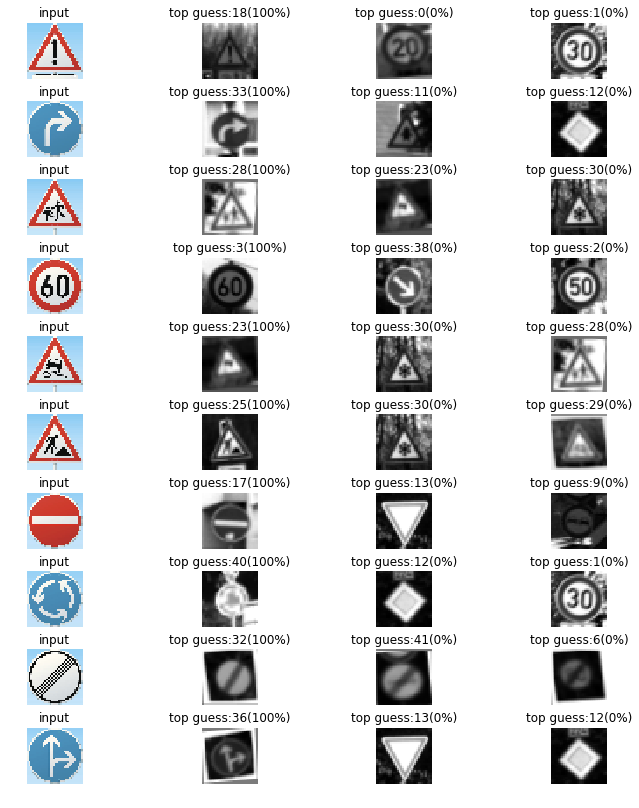

In [44]:
### Analyzing the accuracy for these 10 new images. 

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k = 3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess,'./lenet')
    
    new_softmax_logits = sess.run(softmax_logits, feed_dict = {x:new_images_normalized, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict = {x: new_images_normalized, keep_prob:1.0})
    
    figs,axes = plt.subplots(len(new_images),4,figsize = (12,14))
    figs.subplots_adjust(hspace = .4, wspace = .2)
    axes = axes.ravel()
    
    for i,image in enumerate(new_images):
        axes[4*i].axis('off')
        axes[4*i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        axes[4*i].set_title('input')
        
        guess1 = new_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axes[4*i+1].axis('off')
        axes[4*i+1].imshow(X_valid[index1].squeeze(), cmap = 'gray')
        axes[4*i+1].set_title('top guess:{}({:.0f}%)'.format(guess1, 100*new_top_k[0][i][0]))
        
        guess2 = new_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axes[4*i+2].axis('off')
        axes[4*i+2].imshow(X_valid[index2].squeeze(),cmap = 'gray')
        axes[4*i+2].set_title('top guess:{}({:.0f}%)'.format(guess2, 100*new_top_k[0][i][1]))
        
        guess3 = new_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axes[4*i+3].axis('off')
        axes[4*i+3].imshow(X_valid[index3].squeeze(),cmap = 'gray')
        axes[4*i+3].set_title('top guess:{}({:.0f}%)'.format(guess3, 100*new_top_k[0][i][2]))
        
print('finished')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

finished


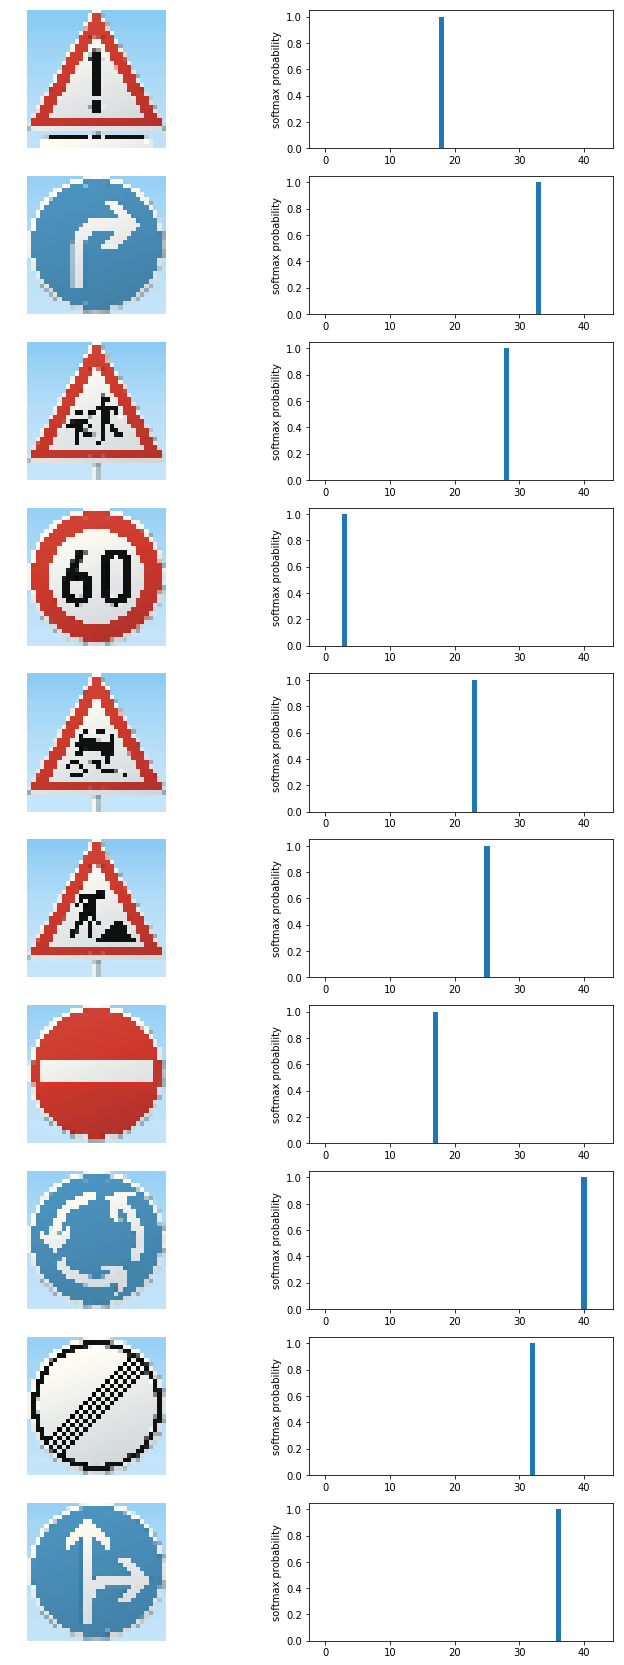

In [45]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
figs, axes = plt.subplots(10,2,figsize = (12,30))
axes = axes.ravel()

for i in range(len(new_softmax_logits)*2):
    if i%2 == 0:
        axes[i].axis('off')
        axes[i].imshow(cv2.cvtColor(new_images[i//2],cv2.COLOR_BGR2RGB))
    else:
        axes[i].bar(np.arange(n_classes),new_softmax_logits[(i-1)//2])
        axes[i].set_ylabel('softmax probability')
        
print('finished')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.